## 因子分析

### 导入包

In [12]:
import os
import pandas as pd
import numpy as np
import alphalens as al
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

### 导入数据及数据预处理

In [8]:
path = '/Users/ryan/Documents/GitHub/GDHF-Quant-Investment/data/data_cleaned'
file_name = 'value_factor_cleaned.gz'
input_file = os.path.join(path, file_name)
df_factor = pd.read_csv(input_file)

df_factor.dropna(inplace=True)      # 删除非交易日数据
df_factor.head()

,S_INFO_WINDCODE,TRADE_DT,S_VAL_PE,S_VAL_PB_NEW,S_VAL_PS,S_DQ_TURN,S_DQ_MV,NET_ASSETS_TODAY
460,603993.SH,20170103,0.762635,-0.056487,1.952345,-0.923542,-0.001855,-0.380103
461,601216.SH,20170103,-0.091148,-0.271236,0.684044,-0.769635,-0.318239,-0.545868
462,600760.SH,20170103,0.667835,2.267898,-0.186259,-1.087732,-0.917858,-0.991170
463,600426.SH,20170103,-0.747287,-0.606472,-0.662188,0.606930,-0.704956,-0.726910
464,600036.SH,20170103,-0.995967,-0.977105,-0.593821,-0.927250,1.997046,1.746359


In [3]:
path = '/Users/ryan/Documents/GitHub/GDHF-Quant-Investment/data'
file_name = 'eod_price.gz'
input_file = os.path.join(path, file_name)
df_stock = pd.read_csv(input_file)
df_stock.head()

,S_INFO_WINDCODE,TRADE_DT,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,S_DQ_AVGPRICE
0,000001.SZ,20170906,11.64,11.59,11.88,11.48,11.70,791621.55,11.6914
1,000002.SZ,20170906,23.76,23.79,24.27,23.50,23.80,361719.63,23.9400
2,000063.SZ,20170906,24.36,24.28,24.99,24.19,24.95,708125.33,24.7464
3,000066.SZ,20170906,8.81,8.80,8.85,8.71,8.81,240351.11,8.7852
4,000069.SZ,20170906,8.75,8.74,8.78,8.68,8.72,216449.20,8.7395


### 特征选择
1. 画出特征的相关系数热力图
2. 使用选择器筛选特征

In [25]:
# 相关系数热力图函数
def heatmap(df):
    df_corr = df.corr()
    sns.heatmap(df_corr, vmin=0, vmax=1, annot=True, square=True, cmap='Oranges')
    plt.show()

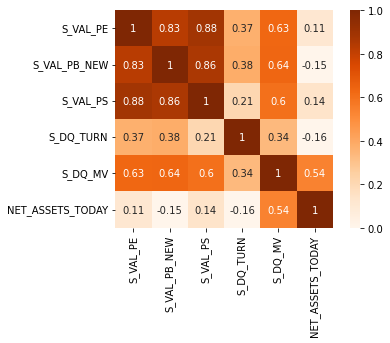

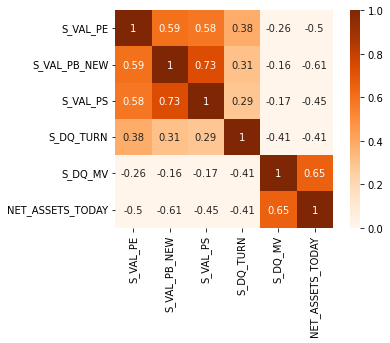

In [26]:
# 单只股票
heatmap(df=df_factor[['S_VAL_PE', 'S_VAL_PB_NEW', 'S_VAL_PS', 'S_DQ_TURN',	'S_DQ_MV',	'NET_ASSETS_TODAY']][df_factor['S_INFO_WINDCODE']=='603993.SH'])
# 全A股
heatmap(df=df_factor[['S_VAL_PE', 'S_VAL_PB_NEW', 'S_VAL_PS', 'S_DQ_TURN',	'S_DQ_MV',	'NET_ASSETS_TODAY']])

In [28]:
# 使用SelectKBest选择器进行特征筛选
data = pd.merge(df_stock[['S_INFO_WINDCODE', 'TRADE_DT', 'S_DQ_CLOSE']], df_factor, on=['S_INFO_WINDCODE', 'TRADE_DT'], how='left')

select = SelectKBest(
    f_regression,
    k=4
)

feature = data[['S_VAL_PE', 'S_VAL_PB_NEW', 'S_VAL_PS', 'S_DQ_TURN', 'S_DQ_MV',	'NET_ASSETS_TODAY']]

selectFeature = select.fit_transform(
    feature,
    data['S_DQ_CLOSE']
)

feature.columns[select.get_support()]

Index(['S_VAL_PE', 'S_VAL_PB_NEW', 'S_VAL_PS', 'NET_ASSETS_TODAY'], dtype='object')

- 存在的问题
在相关系数热力图中，呈现较高相关性的因子仍然在选择器中被筛选出来